In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Feb  7 20:08:37 2023

@author: dan
"""

%reset -f 
# %matplotlib
%matplotlib inline


In [2]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, xlabel, ylabel, title, grid, tight_layout

# from matplotlib import figure, xlabel, ylabel, title, grid, tight_layout


In [3]:
import importlib
import numpy  as np
import pandas as pd
import scipy  as sp

In [4]:
# Project imports
from read_sdata import read_subjects
from analyses   import task_analysis, get_dur_stats, get_avg_vars
from plots      import *
# %reload_ext plots
import plots

dirplots = dir(plots)



In [5]:
# Script settings
make_plots = True
save_plots = True


In [6]:
# Get subject data
subj, cond, aes, ns, files = read_subjects()

# len(subj)
# subj
# cond
# subj


In [7]:
# Get the optimal policy 
total_rew, total_rew_adjusted, policy, best_ind = task_analysis()
opt_policy = np.squeeze(policy[best_ind,:])

opt_policy


array([3785.31933157, 7570.63866315, 2052.45138017, 4104.90276035])

In [8]:
# Determine how subjects' policies change
lms, dur, err, avg, avg_rmse = get_dur_stats(subj, cond, ns, opt_policy)



In [9]:
# Averages of various things
latency, duration, rew, nt = get_avg_vars(subj, ns)

# latency


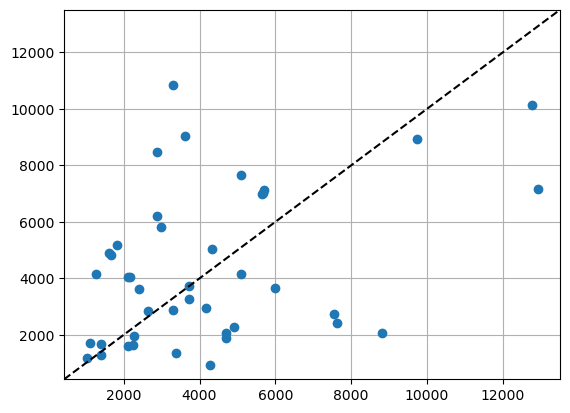

In [16]:
# Plot improvement
plot_dur_err_change_group(err)


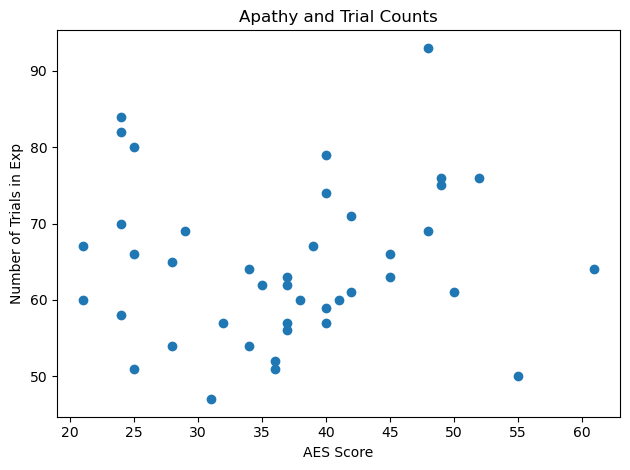

In [17]:
plt.figure()
plt.plot(aes,nt,'o')
xlabel('AES Score')
ylabel('Number of Trials in Exp')
title('Apathy and Trial Counts')
tight_layout()
res = sp.stats.linregress(aes, nt)

# plt.show()

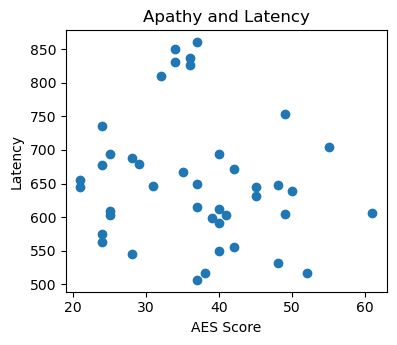

In [18]:
fig = figure()
fig.set_size_inches([4.07, 3.55])
plt.plot(aes, latency,'o')
xlabel('AES Score')
ylabel('Latency')
title('Apathy and Latency')
tight_layout()
res = sp.stats.linregress(aes, latency)
plt.show(fig)



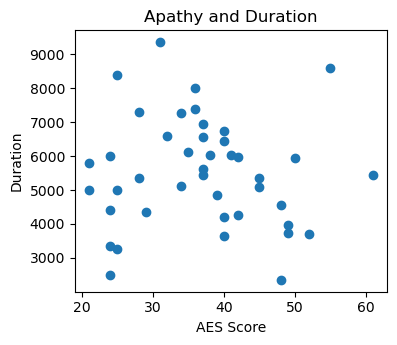

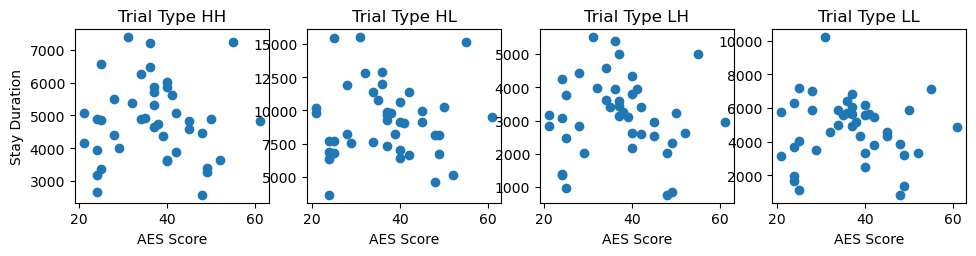

In [19]:
fig = figure()
fig.set_size_inches([4.07, 3.55])
plt.plot(aes, duration,'o')
xlabel('AES Score')
ylabel('Duration')
title('Apathy and Duration')
tight_layout()
res = sp.stats.linregress(aes, duration)

fig = figure()

fig.set_size_inches(11.5,  2.25)

plt.subplot(1,4,1)
plt.plot(aes, avg[:,0],'o')
xlabel('AES Score')
ylabel('Stay Duration')
title('Trial Type HH')
res = sp.stats.linregress(aes, avg[:,0])

plt.subplot(1,4,2)
plt.plot(aes, avg[:,1],'o')
xlabel('AES Score')
title('Trial Type HL')
res = sp.stats.linregress(aes, avg[:,1])

plt.subplot(1,4,3)
plt.plot(aes, avg[:,2],'o')
xlabel('AES Score')
title('Trial Type LH')
res = sp.stats.linregress(aes, avg[:,2])

plt.subplot(1,4,4)
plt.plot(aes, avg[:,3],'o')
xlabel('AES Score')
title('Trial Type LL')
res = sp.stats.linregress(aes, avg[:,3])

In [ ]:
# Make plots (maybe)

# plot_dir = '/Users/nwolpe/Documents/Milkman/foraging/data/figs/'
import plots

if make_plots:
    plot_all(ns, save_plots, dir(plots), subj, cond)

In [ ]:
dir(plots)